### Gabors / Primary Visual Cortex "Simple Cells" from an Image
[link to example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabors_from_astronaut.html#sphx-glr-auto-examples-features-detection-plot-gabors-from-astronaut-py)

c:\Users\AdamSz\anaconda3\lib\site-packages\scipy\cluster\vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


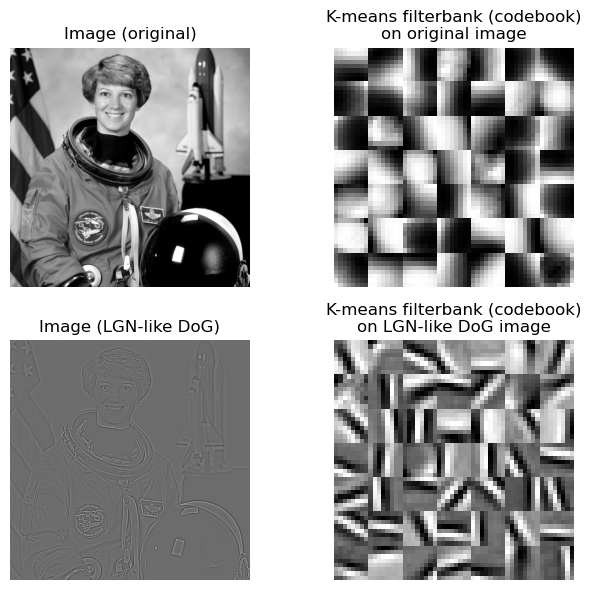

In [6]:
import numpy as np
from scipy.cluster.vq import kmeans2
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.util.shape import view_as_windows
from skimage.util import montage

patch_shape = 8, 8
n_filters = 49

astro = color.rgb2gray(data.astronaut())

# filterbank 1 on original image
patches_1 = view_as_windows(astro, patch_shape)
patches_1 = patches_1.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb_1, _ = kmeans2(patches_1, n_filters, minit='points')
fb_1 = fb_1.reshape((-1, ) + patch_shape)
fb_1_montage = montage(fb_1, rescale_intensity=True)

# filterbank 2 on LGN-like image
astro_dog = ndi.gaussian_filter(astro, .5) - ndi.gaussian_filter(astro, 1)
patches_2 = view_as_windows(astro_dog, patch_shape)
patches_2 = patches_2.reshape(-1, patch_shape[0] * patch_shape[1])[::8]
fb_2, _ = kmeans2(patches_2, n_filters, minit='points')
fb_2 = fb_2.reshape((-1,) + patch_shape)
fb_2_montage = montage(fb_2, rescale_intensity=True)

# plotting
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax = axes.ravel()

ax[0].imshow(astro, cmap=plt.cm.gray)
ax[0].set_title("Image (original)")

ax[1].imshow(fb_1_montage, cmap=plt.cm.gray)
ax[1].set_title("K-means filterbank (codebook)\non original image")

ax[2].imshow(astro_dog, cmap=plt.cm.gray)
ax[2].set_title("Image (LGN-like DoG)")

ax[3].imshow(fb_2_montage, cmap=plt.cm.gray)
ax[3].set_title("K-means filterbank (codebook)\non LGN-like DoG image")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()
plt.show()